In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter

In [2]:
with MPRester("6wCWi8tP1m0OLbQ4") as m:

    # Band structure for material id
    bandStructure = m.get_bandstructure_by_material_id("mp-12908")

# Représentation et détermination de la bande interdite pour un cristal $ScAgSe_2$

Présentation de la zone de Brillouin sur laquelle la bande interdite est étudiée :


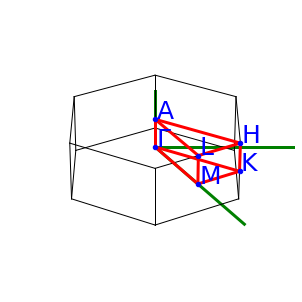

In [3]:
print("Présentation de la zone de Brillouin sur laquelle la bande interdite est étudiée :")
BsPlotter = BSPlotter(bandStructure)
BsPlotter.plot_brillouin()

{'direct': False, 'energy': 0.6794000000000002, 'transition': 'A-L'}


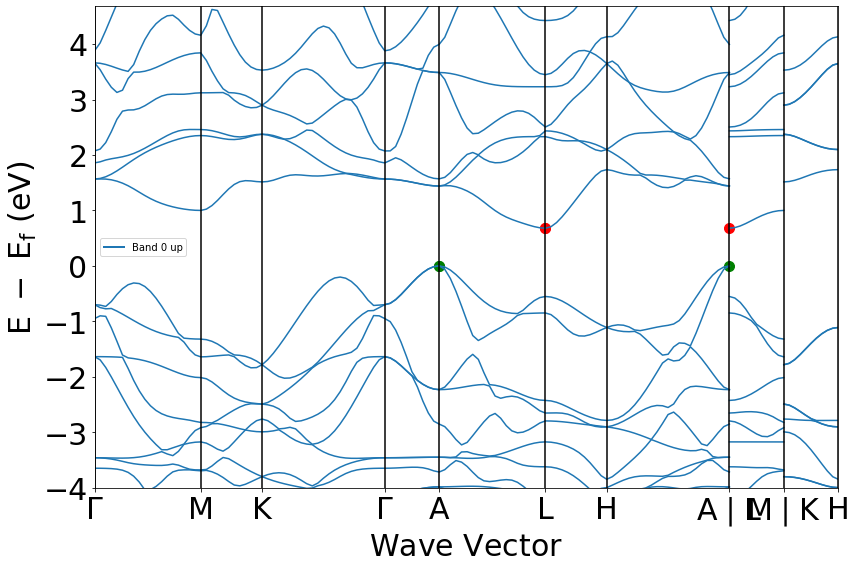

In [4]:
BsPlotter.get_plot(vbm_cbm_marker=True)
BdGap = bandStructure.get_band_gap()
print(BdGap)

Graphiquement il apparait que le gap est indirect. C'est également confirmé par le paramètre 'direct'(de la fonction get_band_gap) qui est décrit comme False. La valeur du gap est de 0.6794000000000002 eV : On a donc affaire à un matériau conducteur.
Le fait que la bande interdite soit indirecte implique que la transition soit moins probable.
Cette transition se fait d'ailleurs là où la bande est la moins étroite. Ce chemin est donné dans le paramètre 'transition', et ici correspond au chemin A-L, comme le graphique le montre (point vert $\rightarrow$ point rouge). Le point A correspond au maximum de la bande de valence alors que le point L correspond au minimum de la bande de conduction.

# Étude de la dispersion : direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion.

In [5]:
print('\n',bandStructure.get_vbm()['band_index'] , "\n -> Les bandes 15 et 16 contiennent l'énergie la plus haute de la bande de valence")
print('\n',bandStructure.get_cbm()['band_index'] , "\n -> La bande 17 contient l'énergie la plus basse de la bande de conduction")


 defaultdict(<class 'list'>, {<Spin.up: 1>: [15, 16]}) 
 -> Les bandes 15 et 16 contiennent l'énergie la plus haute de la bande de valence

 defaultdict(<class 'list'>, {<Spin.up: 1>: [17]}) 
 -> La bande 17 contient l'énergie la plus basse de la bande de conduction


In [6]:
Elem = BsPlotter.bs_plot_data()
EE = Elem.get('energy')
positions = Elem.get('distances')
dist = Elem.get('ticks').get('distance')
Dist = np.array([dist[0],dist[1],dist[3],dist[5],dist[7],dist[9],dist[11],dist[13],dist[14],dist[15]])

In [7]:
dx = np.zeros(9)
dycond = np.zeros(9)
dyval = np.zeros(9)
mcond = np.zeros(9)
mval = np.zeros(9)

for i in range(9):
    dx[i] = Dist[i+1] - Dist[i]
    
for i in range(9):
    dyval[i] =EE.get('1')[i][16][-1] - EE.get('1')[i][16][0]
    dycond[i] =EE.get('1')[i][17][-1] - EE.get('1')[i][17][0]
    
for i in range (9):
    mcond[i] = dycond[i]/dx[i]
    mval[i] = dyval[i]/dx[i]

maxVal = np.max(abs(mval))
minVal = np.min(abs(mval))
maxCond = np.max(abs(mcond))
minCond = np.min(abs(mcond))
print('Pour la dernière bande de valence : \n')
print('La plus grande dispersion a lieu sur: A|L-M|K.','Et vaut :', maxVal, "\n")
print('La plus faible dispersion a lieu sur: A-L.','Et vaut :', minVal, "\n")
print('Pour la première bande de conduction : \n')
print('La plus grande dispersion a lieu sur: L-H.','Et vaut :', maxCond, "\n")
print('La plus faible dispersion a lieu sur: K-Gamma.','Et vaut :', minCond, "\n")

Pour la dernière bande de valence : 

La plus grande dispersion a lieu sur: A|L-M|K. Et vaut : 1.6237129846134704 

La plus faible dispersion a lieu sur: A-L. Et vaut : 0.5971799706524472 

Pour la première bande de conduction : 

La plus grande dispersion a lieu sur: L-H. Et vaut : 1.980403475958721 

La plus faible dispersion a lieu sur: K-Gamma. Et vaut : 0.049205479860413806 



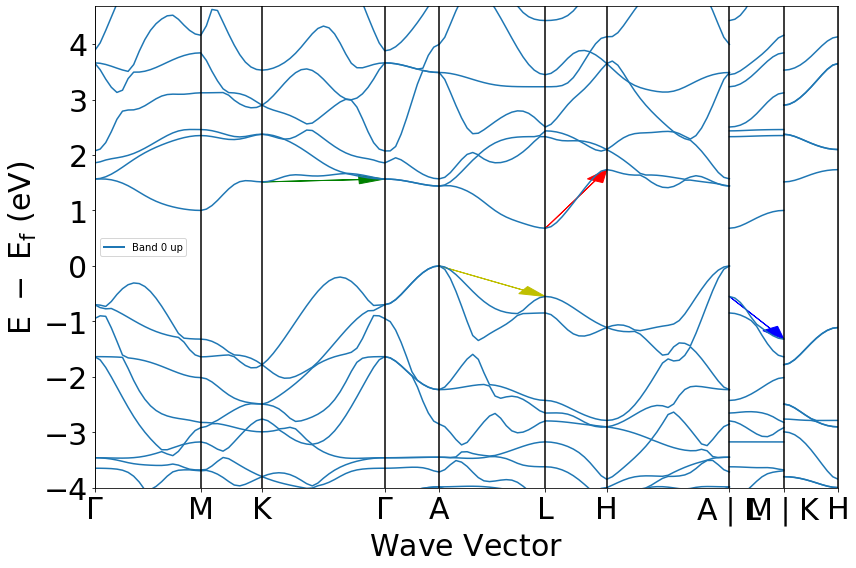

In [8]:
BsPlotter.get_plot()
plt.arrow(Dist[7], (EE.get('1')[7][16])[0], dx[7], dyval[7], color = 'b', head_width = 0.15,length_includes_head=True)
plt.arrow(Dist[4], (EE.get('1')[4][16])[0], dx[4], dyval[4], color = 'y', head_width = 0.15,length_includes_head=True)
plt.arrow(Dist[5], (EE.get('1')[5][17])[0], dx[5], dycond[5], color = 'r', head_width = 0.15,length_includes_head=True)
plt.arrow(Dist[2], (EE.get('1')[2][17])[0], dx[2], dycond[2], color = 'g', head_width = 0.15,length_includes_head=True)

plt.show()

# Calcul de la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.


- Formule de la masse effective :

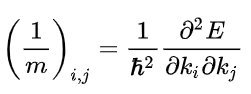

- Avec ℏ la constante de Planck réduite (6,62607004/2π × 10-34 m2 kg/s)
- Et la partie de droite du terme de droite correspondant à la dérivée d'ordre 2 de l'énergie selon le vecteur d'onde k

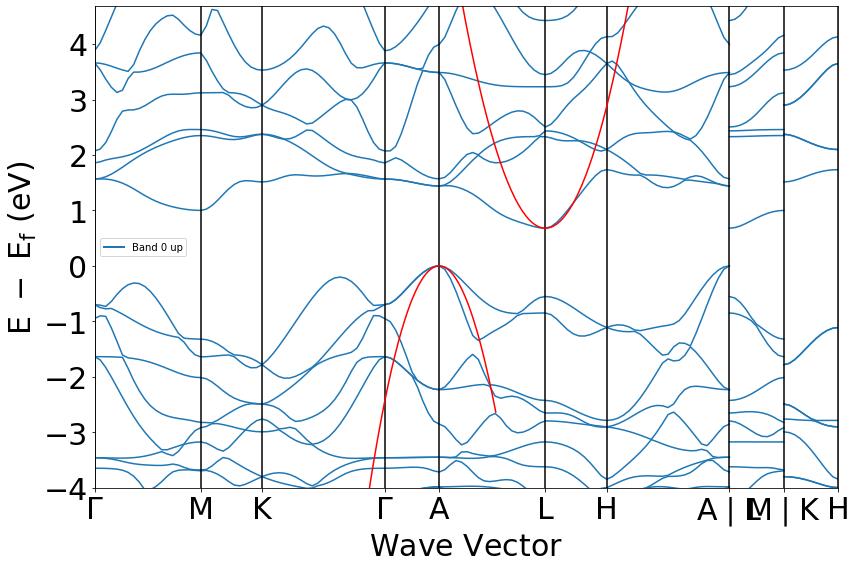

In [9]:
#Position et énergie du sommet de la bande de valence
[xv1,yv1] = [positions[4][0],EE.get('1')[3][16][0]]
#Position et énergie d'un point random 
[xv2,yv2] = [positions[4][4],EE.get('1')[3][16][4]]
# Équation de la parabole : y(k) = mV*(k-pV)**2
mV = yv2/(xv2-xv1)**2
pV = xv1

xV = np.arange(2,3.5,0.01)
yV = mV*(xV-pV)**2

#Position et énergie du bas de la bande de conduction
[xc1,yc1] = [positions[5][0],EE.get('1')[5][17][0]]
#Position et énergie d'un point random
[xc2,yc2] = [positions[5][5],EE.get('1')[5][17][5]]
# Équation de la parabole : y(k) = mC*(k-pC)^2 + yc1

mC = (yc2-yc1)/(xc2-xc1)**2
pC = xc1

xC = np.arange(-1,10,0.01)
yC = mC*(xC-pC)**2 + yc1

BsPlotter.get_plot()
plt.plot(xC,yC,color ='r')
plt.plot(xV,yV,color = 'r')

- On peut maintenant calculer les masses effectives :

In [10]:
print( 'Équation de la parabole au sommet de la bande de valence : y(k) = ',mV,'*( k -',pV,')²')
print('Dérivée seconde de la parabole : y\'\'(k) = ', 2*mV,'[eV.A²]')
print('Pour pouvoir calculer la masse effective, on a besoin de cette dérivée seconde dans les bonnes unités, à savoir [J.m²]')
print('y\'\'(k) = ',2*mV*((10**-10)**2)*1.602176634*(10**-19), '[J.m²]')
print('On peut conclure que la masse effective vaut :',((1.054571817*(10**-34))**2)/(2*mV*((10**-10)**2)*1.602176634*(10**-19)),'[kg]')

Équation de la parabole au sommet de la bande de valence : y(k) =  -10.882298092091403 *( k - 2.9977389731635413 )²
Dérivée seconde de la parabole : y''(k) =  -21.764596184182807 [eV.A²]
Pour pouvoir calculer la masse effective, on a besoin de cette dérivée seconde dans les bonnes unités, à savoir [J.m²]
y''(k) =  -3.487072745474326e-38 [J.m²]
On peut conclure que la masse effective vaut : -3.1892701941880654e-31 [kg]


In [11]:
print( 'Équation de la parabole à la base de la bande de conduction : y(k) = ',mC,'*( k -',pC,')²+ ',yc1)
print('Dérivée seconde de la parabole : y\'\'(k) = ', 2*mC,'[eV.A²]')
print('Pour pouvoir calculer la masse effective, on a besoin de cette dérivée seconde dans les bonnes unités, à savoir [J.m²]')
print('y\'\'(k) = ',2*mC*((10**-10)**2)*1.602176634*(10**-19), '[J.m²]')
print('On peut conclure que la masse effective vaut :',((1.054571817*(10**-34))**2)/(2*mC*((10**-10)**2)*1.602176634*(10**-19)),'[kg]')

Équation de la parabole à la base de la bande de conduction : y(k) =  7.729432453193013 *( k - 3.9217485299427692 )²+  0.6794000000000002
Dérivée seconde de la parabole : y''(k) =  15.458864906386026 [eV.A²]
Pour pouvoir calculer la masse effective, on a besoin de cette dérivée seconde dans les bonnes unités, à savoir [J.m²]
y''(k) =  2.476783214117429e-38 [J.m²]
On peut conclure que la masse effective vaut : 4.490185943088169e-31 [kg]


# Références : 

- Wikipédia (https://fr.wikipedia.org/wiki/Masse_effective)
- LMAPR1492 : Physique des matériaux (Partie du Prof. Rignanese)